## LIVE - SERIE HISTÓRICA DE PREÇOS DE COMBUSTÍVEIS
- Source: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis
- Scope: 2° semestre de 2022

In [1]:
import polars as pl

### Reading data

In [2]:
df = pl.read_csv('..\..\data\live-2023-05-16\ca-2022-02\ca-2022-02.csv',
                separator=';',
                try_parse_dates=True)

In [3]:
df.head()

Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
str,str,str,str,str,str,str,str,str,str,str,date,str,str,str,str
"""SE""","""ES""","""COLATINA""","""SAO FRANCISCO …",""" 08.519.545/00…","""PRACA FIDELIS …","""35""",null,"""LACE""","""29703-030""","""GASOLINA ADITI…",2022-07-01,"""7,48""",null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""SAO FRANCISCO …",""" 08.519.545/00…","""PRACA FIDELIS …","""35""",null,"""LACE""","""29703-030""","""GASOLINA""",2022-07-01,"""7,38""",null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""DIESEL S10""",2022-07-01,"""7,69""",null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""ETANOL""",2022-07-01,"""5,99""",null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""GASOLINA""",2022-07-01,"""7,39""",null,"""R$ / litro""","""VIBRA ENERGIA"""


### Converting column type

In [4]:
df = df.with_columns(pl.col('Valor de Venda').str.replace(',', '.'))
df = df.with_columns(pl.col('Valor de Venda').cast(pl.Float64))
df.head()

Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
str,str,str,str,str,str,str,str,str,str,str,date,f64,str,str,str
"""SE""","""ES""","""COLATINA""","""SAO FRANCISCO …",""" 08.519.545/00…","""PRACA FIDELIS …","""35""",null,"""LACE""","""29703-030""","""GASOLINA ADITI…",2022-07-01,7.48,null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""SAO FRANCISCO …",""" 08.519.545/00…","""PRACA FIDELIS …","""35""",null,"""LACE""","""29703-030""","""GASOLINA""",2022-07-01,7.38,null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""DIESEL S10""",2022-07-01,7.69,null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""ETANOL""",2022-07-01,5.99,null,"""R$ / litro""","""VIBRA ENERGIA"""
"""SE""","""ES""","""COLATINA""","""POSTO MOTOCAP …",""" 04.814.652/00…","""PRACA ALMIRANT…","""52""","""LETRA A""","""LACE""","""29703-055""","""GASOLINA""",2022-07-01,7.39,null,"""R$ / litro""","""VIBRA ENERGIA"""


### "Select" Example

In [5]:
df.select(["Regiao - Sigla", "Estado - Sigla", "Revenda", "Produto",
           "Data da Coleta", "Valor de Venda", "Bandeira"]).head()

Regiao - Sigla,Estado - Sigla,Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
str,str,str,str,date,f64,str
"""SE""","""ES""","""SAO FRANCISCO …","""GASOLINA ADITI…",2022-07-01,7.48,"""VIBRA ENERGIA"""
"""SE""","""ES""","""SAO FRANCISCO …","""GASOLINA""",2022-07-01,7.38,"""VIBRA ENERGIA"""
"""SE""","""ES""","""POSTO MOTOCAP …","""DIESEL S10""",2022-07-01,7.69,"""VIBRA ENERGIA"""
"""SE""","""ES""","""POSTO MOTOCAP …","""ETANOL""",2022-07-01,5.99,"""VIBRA ENERGIA"""
"""SE""","""ES""","""POSTO MOTOCAP …","""GASOLINA""",2022-07-01,7.39,"""VIBRA ENERGIA"""


### Converting Polars to Pandas

In [6]:
df_pandas = df.select(["Regiao - Sigla", "Estado - Sigla", "Revenda", "Produto",
           "Data da Coleta", "Valor de Venda", "Bandeira"]).to_pandas()
df_pandas.head()

,Regiao - Sigla,Estado - Sigla,Revenda,Produto,Data da Coleta,Valor de Venda,Bandeira
0,SE,ES,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,GASOLINA ADITIVADA,2022-07-01,7.48,VIBRA ENERGIA
1,SE,ES,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,GASOLINA,2022-07-01,7.38,VIBRA ENERGIA
2,SE,ES,POSTO MOTOCAP LTDA,DIESEL S10,2022-07-01,7.69,VIBRA ENERGIA
3,SE,ES,POSTO MOTOCAP LTDA,ETANOL,2022-07-01,5.99,VIBRA ENERGIA
4,SE,ES,POSTO MOTOCAP LTDA,GASOLINA,2022-07-01,7.39,VIBRA ENERGIA


### Importing new libs

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [15]:
len(df['Regiao - Sigla'].unique())

5

In [16]:
df['Regiao - Sigla'].unique()

Regiao - Sigla
str
"""CO"""
"""NE"""
"""S"""
"""N"""
"""SE"""


In [21]:
df['Regiao - Sigla'].value_counts() #Polars don't have "normalize" parameters pandas equivalent

Regiao - Sigla,counts
str,u32
"""CO""",33552
"""SE""",182865
"""N""",24973
"""NE""",71457
"""S""",65231


In [23]:
df['Valor de Venda'].describe()

statistic,value
str,f64
"""count""",378078.0
"""null_count""",0.0
"""mean""",5.642364
"""std""",1.200443
"""min""",2.49
"""max""",9.65
"""median""",5.49
"""25%""",4.85
"""75%""",6.65


#### Boxplot

<Axes: ylabel='Valor de Venda'>

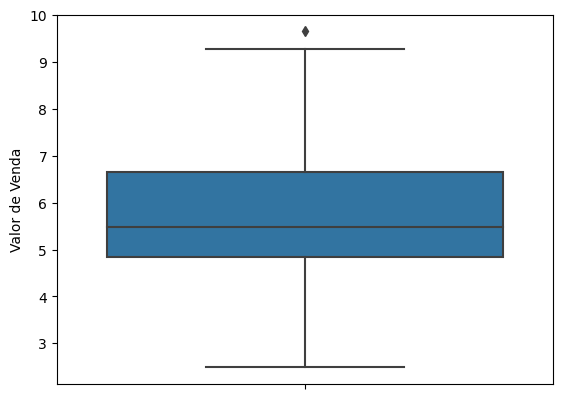

In [25]:
sns.boxplot(y= df['Valor de Venda'])

#### Count unique "Product" type

In [44]:
df['Produto'].value_counts()

Produto,counts
str,u32
"""GNV""",7735
"""DIESEL S10""",74662
"""GASOLINA ADITI…",73068
"""GASOLINA""",96323
"""DIESEL""",41762
"""ETANOL""",84528


#### Boxplot for "GNV" product

<Axes: ylabel='Valor de Venda'>

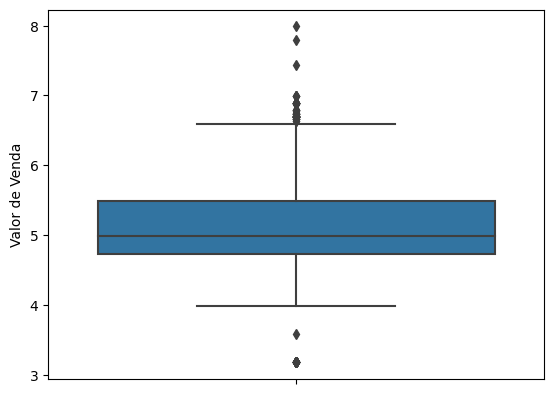

In [34]:
sns.boxplot(y=df.filter(pl.col('Produto') == 'GNV')['Valor de Venda'])

#### Boxplot for "DIESEL S10" produt

<Axes: ylabel='Valor de Venda'>

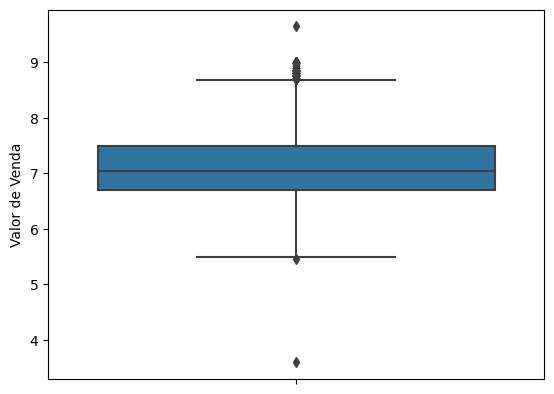

In [35]:
sns.boxplot(y=df.filter(pl.col('Produto') == 'DIESEL S10')['Valor de Venda'])

#### Boxplot for "GASOLINA" produt

<Axes: ylabel='Valor de Venda'>

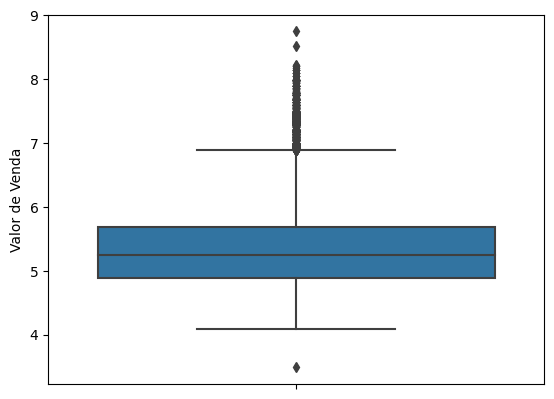

In [36]:
sns.boxplot(y = df.filter(pl.col('Produto') == 'GASOLINA')['Valor de Venda'])

#### Boxplot for "GASOLINA ADITIVADA" produt

<Axes: ylabel='Valor de Venda'>

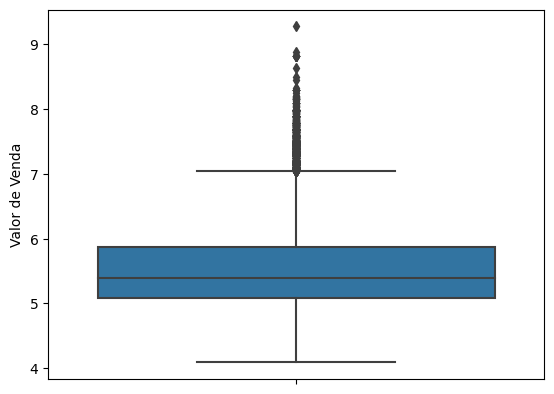

In [45]:
sns.boxplot(y = df.filter(pl.col('Produto') == 'GASOLINA ADITIVADA')['Valor de Venda'])

#### Boxplot for "DIESEL" produt

<Axes: ylabel='Valor de Venda'>

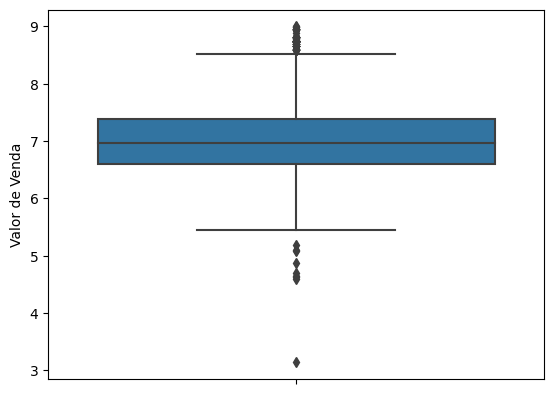

In [46]:
sns.boxplot(y = df.filter(pl.col('Produto') == 'DIESEL')['Valor de Venda'])

#### Boxplot for "ETANOL" produt

<Axes: ylabel='Valor de Venda'>

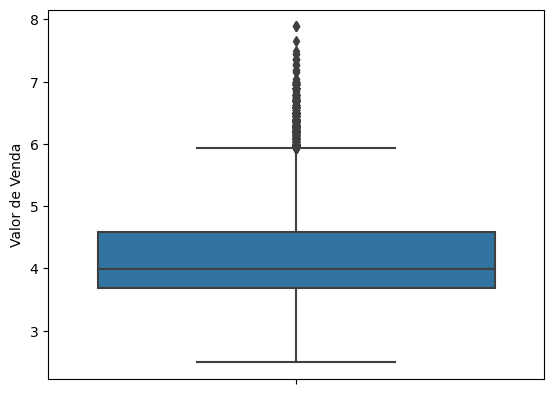

In [47]:
sns.boxplot(y = df.filter(pl.col('Produto') == 'ETANOL')['Valor de Venda'])